# Jobsheet 02 - Regression

Isikan identitas berikut <br>
**NIM: 2041720080 <br>**
**Nama: Elvira Sania Mufida <br>**
**Kelas: TI-3G**

## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [2]:
# import package
import numpy as np
import pandas as pd

In [3]:
# baca data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/coin_XRP.csv')
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.0,4.387916e+07
1,2,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.0,3.659101e+07
2,3,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.0,3.453412e+07
3,4,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.0,3.325863e+07
4,5,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.0,3.354750e+07


In [21]:
data

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,XRP,XRP,2013-08-05 23:59:59,0.005980,0.005613,0.005875,0.005613,0.000000e+00,4.387916e+07
1,2,XRP,XRP,2013-08-06 23:59:59,0.005661,0.004629,0.005637,0.004680,0.000000e+00,3.659101e+07
2,3,XRP,XRP,2013-08-07 23:59:59,0.004682,0.004333,0.004669,0.004417,0.000000e+00,3.453412e+07
3,4,XRP,XRP,2013-08-08 23:59:59,0.004424,0.004175,0.004397,0.004254,0.000000e+00,3.325863e+07
4,5,XRP,XRP,2013-08-09 23:59:59,0.004367,0.004253,0.004257,0.004291,0.000000e+00,3.354750e+07
...,...,...,...,...,...,...,...,...,...,...
2888,2889,XRP,XRP,2021-07-02 23:59:59,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10
2889,2890,XRP,XRP,2021-07-03 23:59:59,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10
2890,2891,XRP,XRP,2021-07-04 23:59:59,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10
2891,2892,XRP,XRP,2021-07-05 23:59:59,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10


In [4]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2893 non-null   int64  
 1   Name       2893 non-null   object 
 2   Symbol     2893 non-null   object 
 3   Date       2893 non-null   object 
 4   High       2893 non-null   float64
 5   Low        2893 non-null   float64
 6   Open       2893 non-null   float64
 7   Close      2893 non-null   float64
 8   Volume     2893 non-null   float64
 9   Marketcap  2893 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 226.1+ KB


,SNo,High,Low,Open,Close,Volume,Marketcap
count,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2.893000e+03,2.893000e+03
mean,1447.000000,0.246591,0.222000,0.234548,0.234790,1.260299e+09,9.678507e+09
std,835.281489,0.365393,0.311581,0.338544,0.338629,3.137958e+09,1.385907e+10
min,1.000000,0.003082,0.002802,0.002809,0.002810,0.000000e+00,2.196991e+07
25%,724.000000,0.007531,0.007093,0.007332,0.007346,4.780950e+05,2.263168e+08
50%,1447.000000,0.189184,0.176196,0.181968,0.182608,1.119370e+08,7.523251e+09
75%,2170.000000,0.320751,0.303941,0.312021,0.312465,1.238721e+09,1.306444e+10
max,2893.000000,3.841940,3.117340,3.363570,3.377810,3.695518e+10,1.308535e+11


### Visualisasi Data

In [5]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


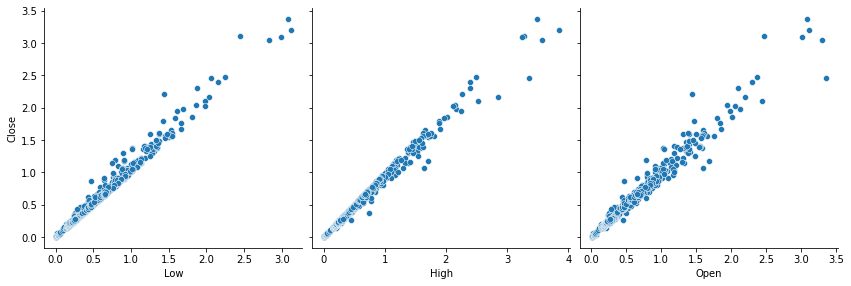

In [6]:
# operasi visualisasi
sns.pairplot(data, x_vars=['Low', 'High','Open'], 
             y_vars='Close', size=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

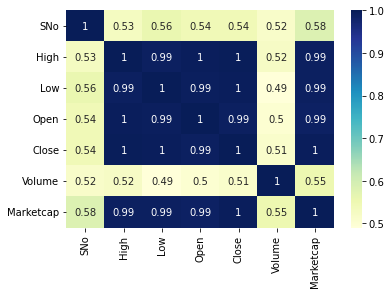

In [7]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa [Close] memiliki korelasi yang paling kuat terhadap [High]

### Regresi Linier

In [8]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['High']
y = data['Close']

In [9]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [10]:
# hasil training dtaset
X_train
y_train

2754    0.532433
613     0.008512
1289    0.006278
2399    0.231193
1419    0.311110
          ...   
1930    0.491654
79      0.007873
1859    0.291435
2840    1.485880
1544    0.202785
Name: Close, Length: 2025, dtype: float64

In [11]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    0.008465
High     0.916345
dtype: float64

In [13]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.217e+05
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        08:39:46   Log-Likelihood:                 4097.9
No. Observations:                2025   AIC:                            -8192.
Df Residuals:                    2023   BIC:                            -8181.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0085      0.001      9.864      0.000       0.007       0.010
High           0.9163      0.002    470.848      0.000       0.913       0.920
==============================================================================
Omnibus:                     2996.933   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1681946.323
Skew:                          -8.604   Prob(JB):                         0.00
Kurtosis:                     143.136   Cond. No.                         2.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

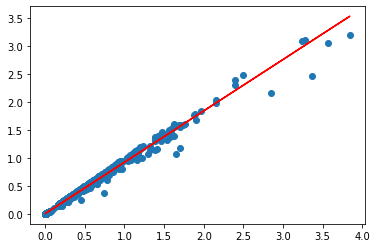

In [14]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.008465 + 0.916345 *X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [15]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


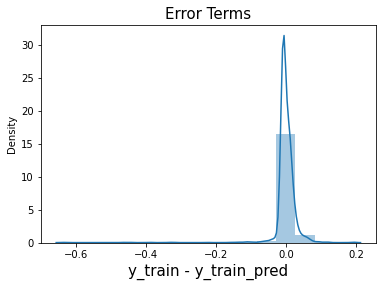

In [16]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

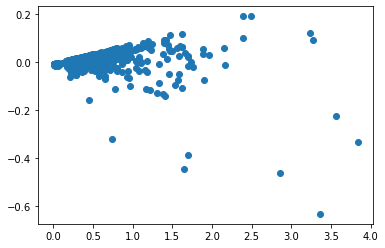

In [17]:
plt.scatter(X_train,res)
plt.show()

In [18]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


2331    0.190024
2311    0.212974
219     0.022374
610     0.016785
753     0.015388
dtype: float64

In [19]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9954968503245307

perlu diperhatikan bahwa r^2 dari data trainign adalah 	0.991 sedangkan dari data testing adalah  0.9954968503245307. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

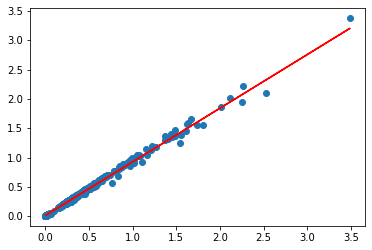

In [20]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()